The Iris data has three types of Iris flowers which are three classes in the dependent variable. And it contains four independent variables which are sepal length, sepal width, petal length and petal width, all in cm. We will compare the original classes with the classes formed using hierarchical clustering method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
df = pd.read_csv('iris.csv')
df.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Data Preprocessing
Now we will seperate the target variable(y), and features (x) as follows

In [3]:
flower_type = df['Species']

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
flower_type = le.fit_transform(flower_type)
flower_type

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df['Species'] = flower_type
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df = df.rename(columns = {'Species':'flower_type'})
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Visualise the Classes

In [7]:
x = df.iloc[:, [0, 1, 2, 3]].values
y = df.iloc[:, 4].values

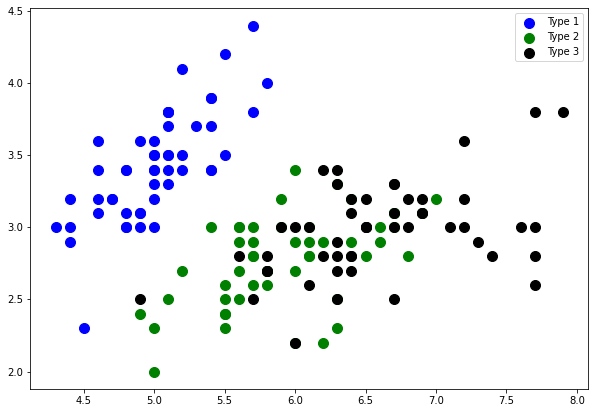

In [8]:
plt.figure(figsize = (10, 7))
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'green', label = 'Type 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'black', label = 'Type 3')
plt.legend()
plt.show()

# Create a dendrogram
We start by importing the library that will help to create dendrograms. Dendrogram helps to give a rough idea of the number of clusters.

Text(0, 0.5, 'Euclidean Distance')

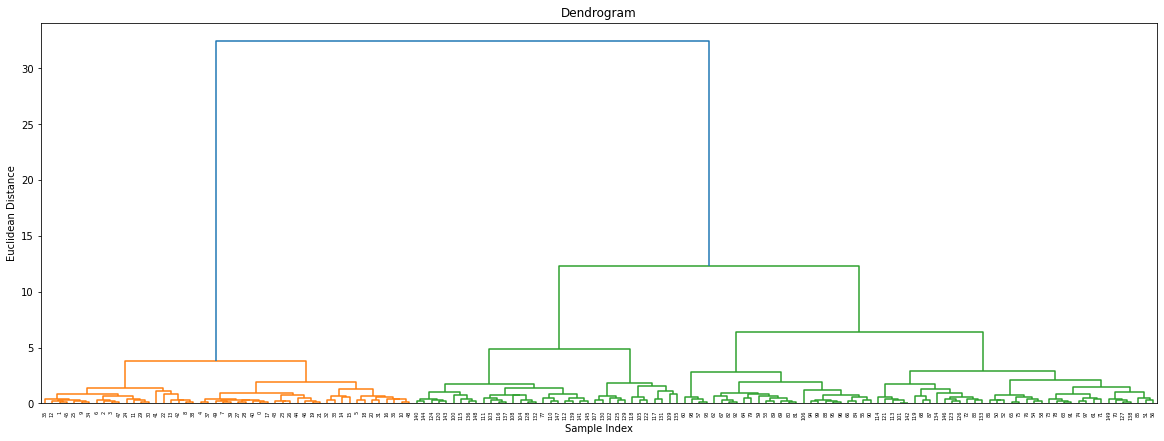

In [9]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize = (20, 7))
plt.title('Dendrogram')
sc.dendrogram(sc.linkage(x, method = 'ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(x)
labels = cluster.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

# Visualises the Cluster

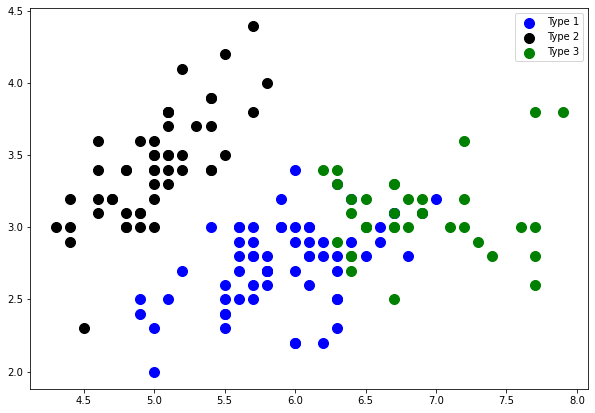

In [11]:
plt.figure(figsize = (10, 7))
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 100, c = 'black', label = 'Type 2')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 100, c = 'green', label = 'Type 3')
plt.legend()
plt.show()